In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv("/home/yash/Downloads/placement(1).csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package (in LPA)')

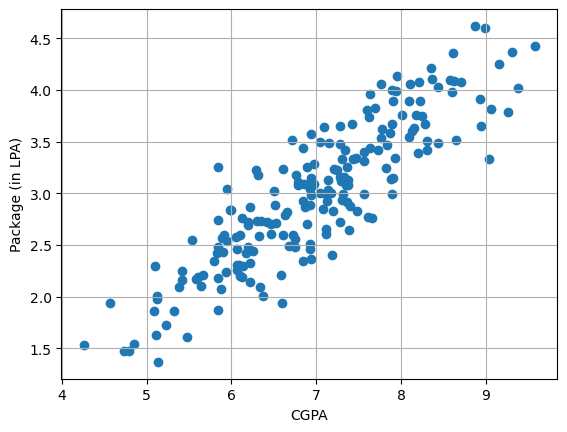

In [109]:
plt.Figure(dpi = 500)
plt.grid(True)
plt.scatter(x = df["cgpa"],y = df["package"])
plt.xlabel("CGPA")
plt.ylabel("Package (in LPA)")

In [110]:
x = df[["cgpa"]]
y = df[["package"]]

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [112]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [113]:
y_pred = lr.predict(x_test)
pd.DataFrame(y_pred).head(7)

,0
0,2.970126
1,2.555168
2,2.618565
3,3.402374
4,3.056576
5,2.359216
6,3.517640


In [114]:
pd.DataFrame(y_test).head(7)

,package
18,2.98
170,2.87
107,2.59
98,3.83
177,3.64
182,2.08
5,2.99


Text(0, 0.5, 'Package (in LPA)')

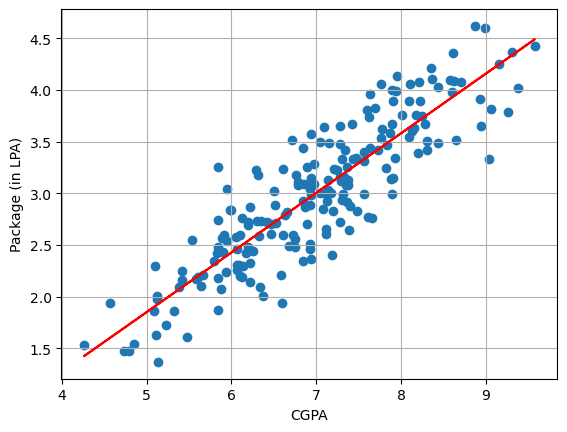

In [115]:
plt.Figure(dpi = 500)
plt.grid(True)
plt.scatter(x = df["cgpa"],y = df["package"])
plt.plot(x_train,lr.predict(x_train),color = "Red")
plt.xlabel("CGPA")
plt.ylabel("Package (in LPA)")

In [116]:
print("Slop : ",lr.coef_)

Slop :  [[0.57633042]]


In [117]:
print("Intercept : ",lr.intercept_)

Intercept :  [-1.02960704]


In [118]:
# y = mx + c
# where y = pacage, x = cgpa, m = 0.57633042, b = -1.02960704

### MAE, MSE, RMSE, R2 Score, Adjusted R2 Score

In [119]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [120]:
print("MAE :",mean_absolute_error(y_test,y_pred))

MAE : 0.2552433448620408


In [121]:
print("MSE :",mean_squared_error(y_test,y_pred))

MSE : 0.10221131059334207


In [122]:
print("RMSE :",root_mean_squared_error(y_test,y_pred))

RMSE : 0.31970503685951224


In [123]:
print("R2 Score :",r2_score(y_test,y_pred))
r2s = r2_score(y_test,y_pred)

R2 Score : 0.7297167943957027


In [124]:
# Adjusted R2 Score

k =  1 # Depent collumn
n = 40 # numbers of rows
AR2S = 1 - ((1-r2s)*(n-1)/(n-k-1))
print("Adjusted R2 Score :",AR2S)

Adjusted R2 Score : 0.7226040784587475


In [125]:
### Add new Random Collumns in Data Frame to see how that collumns affect on Adjusted R2 Score ###

In [126]:
new_df = df.copy()
new_df["Random"] = np.random.random(200)
new_df.head()

,cgpa,package,Random
0,6.89,3.26,0.065037
1,5.12,1.98,0.968423
2,7.82,3.25,0.334149
3,7.42,3.67,0.712780
4,6.94,3.57,0.958871


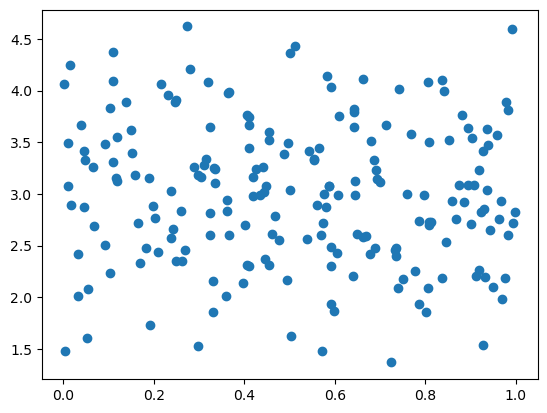

In [127]:
plt.scatter(new_df["Random"],new_df["package"])

In [128]:
x_new = new_df[["cgpa","Random"]]
y_new = new_df[["package"]]

In [129]:
from sklearn.model_selection import train_test_split
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(x_new,y_new,test_size = 0.2,random_state = 0)

In [130]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_new,y_train_new)

LinearRegression()

In [131]:
y_pred_new = lr.predict(x_test_new)

In [132]:
print("New R2 Score :",r2_score(np.array(y_test_new),np.array(y_pred_new)))

New R2 Score : 0.7135015577625483


In [133]:
# Adjusted R2 Score

k =  2 # Depent collumn
n = 40 # numbers of rows
AR2S = 1 - ((1-r2s)*(n-1)/(n-k-1))
print("New Adjusted R2 Score :",AR2S)

New Adjusted R2 Score : 0.715106891390065


In [134]:
### Add new Random Collumns in Data Frame to see how that collumns affect on Adjusted R2 Score, That collumns affects on output collumn ###

In [135]:
new_df2 = df.copy()
new_df2["Random"] = new_df["package"] + (np.random.randint(-12,12,200)/10) # add random collumn 

In [136]:
new_df2.head()

,cgpa,package,Random
0,6.89,3.26,4.16
1,5.12,1.98,3.08
2,7.82,3.25,2.65
3,7.42,3.67,3.57
4,6.94,3.57,2.87


Text(0, 0.5, 'Package')

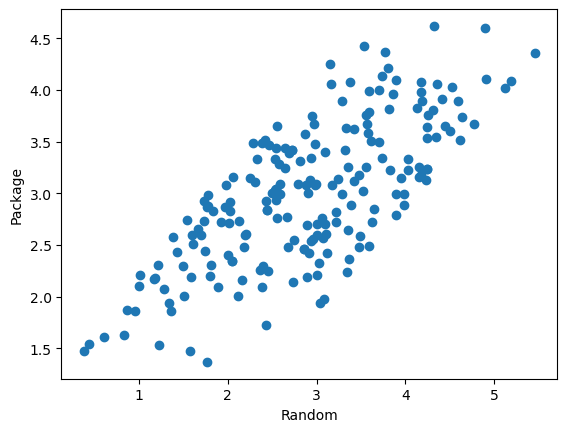

In [137]:
plt.scatter(new_df2["Random"],new_df2["package"])
plt.xlabel("Random")
plt.ylabel("Package")

In [138]:
x_new2 = new_df2[["cgpa","Random"]]
y_new2 = new_df2[["package"]]

In [139]:
from sklearn.model_selection import train_test_split
x_train_new2,x_test_new2,y_train_new2,y_test_new2 = train_test_split(x_new,y_new,test_size = 0.2,random_state = 0)

In [140]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_new2,y_train_new2)

LinearRegression()

In [141]:
y_pred_new2 = lr.predict(x_test_new2)

In [142]:
print("2nd New R2 Score :",r2_score(np.array(y_test_new2),np.array(y_pred_new2)))

2nd New R2 Score : 0.7135015577625483


In [143]:
# Adjusted R2 Score

k =  2 # Depent collumn
n = 40 # numbers of rows
AR2S2 = 1 - ((1-r2s)*(n-1)/(n-k-1))
print("2nd New Adjusted R2 Score :",AR2S2)

2nd New Adjusted R2 Score : 0.715106891390065
